In [1]:
from scipy.stats import linregress
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
import hvplot.pandas
import pandas as pd

In [2]:
# Load the data for Counties adoption rate analysis
df = pd.read_csv(
    Path("../../../../../data/processed_data/ev_main_dataset.csv"),
)

# Display the data
print("Shape:", df.shape)
df

Shape: (2011, 10)


,year,state,county,zip_codes,population,ev_registrations,cumulative_ev_stations,median_income,ev_adoption_rate,ev_growth_rate
0,2010,CA,Alameda County,"[94501, 94502, 94536, 94537, 94538, 94539, 945...",1512986,20,0,69384,0.000013,NaN
1,2010,CA,Amador County,"[95601, 95629, 95640, 95642, 95654, 95665, 956...",37886,1,1,54758,0.000026,NaN
2,2010,CA,Contra Costa County,"[94505, 94506, 94507, 94509, 94511, 94513, 945...",1052540,10,0,78385,0.000010,NaN
3,2010,CA,Fresno County,"[93210, 93234, 93242, 93602, 93605, 93606, 936...",932039,2,0,46430,0.000002,NaN
4,2010,CA,Humboldt County,"[95501, 95502, 95503, 95511, 95514, 95518, 955...",135009,2,0,40089,0.000015,NaN
...,...,...,...,...,...,...,...,...,...,...
2006,2022,TX,Wood County,"[75410, 75444, 75494, 75497, 75765, 75773, 75783]",46930,188,0,61748,0.004006,3.101753
2007,2022,TX,Yoakum County,"[79323, 79355]",7484,10,1,80317,0.001336,9.105559
2008,2022,TX,Young County,"[76372, 76374, 76450, 76460, 76481]",18012,94,0,65565,0.005219,5.688565
2009,2022,TX,Zapata County,"[78067, 78076, 78564]",13838,10,0,35061,0.000723,0.671123


In [3]:
# Inspect the columns of the data
for index, value in enumerate(df.columns):
    print(index, value)

0 year
1 state
2 county
3 zip_codes
4 population
5 ev_registrations
6 cumulative_ev_stations
7 median_income
8 ev_adoption_rate
9 ev_growth_rate


In [4]:
# Convert `ev_adoption_rate` and `ev_growth_rate` to percentages
df["ev_adoption_rate"] = df["ev_adoption_rate"] * 100
df["ev_growth_rate"] = df["ev_growth_rate"] * 100

# Display the data
print("Shape:", df.shape)
df

Shape: (2011, 10)


,year,state,county,zip_codes,population,ev_registrations,cumulative_ev_stations,median_income,ev_adoption_rate,ev_growth_rate
0,2010,CA,Alameda County,"[94501, 94502, 94536, 94537, 94538, 94539, 945...",1512986,20,0,69384,0.001322,NaN
1,2010,CA,Amador County,"[95601, 95629, 95640, 95642, 95654, 95665, 956...",37886,1,1,54758,0.002639,NaN
2,2010,CA,Contra Costa County,"[94505, 94506, 94507, 94509, 94511, 94513, 945...",1052540,10,0,78385,0.000950,NaN
3,2010,CA,Fresno County,"[93210, 93234, 93242, 93602, 93605, 93606, 936...",932039,2,0,46430,0.000215,NaN
4,2010,CA,Humboldt County,"[95501, 95502, 95503, 95511, 95514, 95518, 955...",135009,2,0,40089,0.001481,NaN
...,...,...,...,...,...,...,...,...,...,...
2006,2022,TX,Wood County,"[75410, 75444, 75494, 75497, 75765, 75773, 75783]",46930,188,0,61748,0.400597,310.175344
2007,2022,TX,Yoakum County,"[79323, 79355]",7484,10,1,80317,0.133618,910.555852
2008,2022,TX,Young County,"[76372, 76374, 76450, 76460, 76481]",18012,94,0,65565,0.521874,568.856477
2009,2022,TX,Zapata County,"[78067, 78076, 78564]",13838,10,0,35061,0.072265,67.112299


In [5]:
# Create separate DataFrames for Texas, Florida, and California
tx_df = df[df["state"] == "TX"].sort_values(["year", "state", "county"]).reset_index(drop=True)
fl_df = df[df["state"] == "FL"].sort_values(["year", "state", "county"]).reset_index(drop=True)
ca_df = df[df["state"] == "CA"].sort_values(["year", "state", "county"]).reset_index(drop=True)

# Display the DataFrames
display(tx_df.head(2))
display(fl_df.head(2))
display(ca_df.head(2))

,year,state,county,zip_codes,population,ev_registrations,cumulative_ev_stations,median_income,ev_adoption_rate,ev_growth_rate
0,2017,TX,Anderson County,"[75763, 75779, 75801, 75802, 75803, 75832, 758...",58175,1,0,42313,0.001719,NaN
1,2017,TX,Andrews County,[79714],17603,1,0,70753,0.005681,NaN


,year,state,county,zip_codes,population,ev_registrations,cumulative_ev_stations,median_income,ev_adoption_rate,ev_growth_rate
0,2018,FL,Alachua County,"[32601, 32602, 32603, 32604, 32605, 32606, 326...",268851,766,12,49078,0.284916,NaN
1,2018,FL,Baker County,"[32040, 32063, 32072, 32087]",28353,5,0,61769,0.017635,NaN


,year,state,county,zip_codes,population,ev_registrations,cumulative_ev_stations,median_income,ev_adoption_rate,ev_growth_rate
0,2010,CA,Alameda County,"[94501, 94502, 94536, 94537, 94538, 94539, 945...",1512986,20,0,69384,0.001322,NaN
1,2010,CA,Amador County,"[95601, 95629, 95640, 95642, 95654, 95665, 956...",37886,1,1,54758,0.002639,NaN


# Correlation Matrix

In [6]:
# Columns to check for correlation
columns_corr = ['ev_adoption_rate', "cumulative_ev_stations", "median_income"]

In [7]:
# Display the correlation dataframe for all years together for all counties in...
# California, Florida, and Texas

for state_df in [ca_df, fl_df, tx_df]:
    print(f"\033[1m\033[93m{state_df['state'][0]}\033[0m")
    display(state_df[columns_corr].corr().style.background_gradient(cmap='coolwarm'))

CA


,ev_adoption_rate,cumulative_ev_stations,median_income
ev_adoption_rate,1.000000,0.463563,0.749299
cumulative_ev_stations,0.463563,1.000000,0.304546
median_income,0.749299,0.304546,1.000000


FL


,ev_adoption_rate,cumulative_ev_stations,median_income
ev_adoption_rate,1.000000,0.504081,0.683570
cumulative_ev_stations,0.504081,1.000000,0.281179
median_income,0.683570,0.281179,1.000000


TX


,ev_adoption_rate,cumulative_ev_stations,median_income
ev_adoption_rate,1.000000,0.443204,0.447105
cumulative_ev_stations,0.443204,1.000000,0.237789
median_income,0.447105,0.237789,1.000000


In [8]:
# Display correlation dataframe for every year in the California DataFrame
print("\033[1m\033[96mCalifornia\033[0m")
for year in ca_df["year"].unique():
    ca_year_df = ca_df[ca_df["year"] == year]
    print(f"\033[1m\033[93m{year}\033[0m")
    display(ca_year_df[columns_corr].corr().style.background_gradient(cmap='coolwarm'))

California
2010


,ev_adoption_rate,cumulative_ev_stations,median_income
ev_adoption_rate,1.000000,0.190233,0.686716
cumulative_ev_stations,0.190233,1.000000,-0.102791
median_income,0.686716,-0.102791,1.000000


2011


,ev_adoption_rate,cumulative_ev_stations,median_income
ev_adoption_rate,1.000000,0.135584,0.808851
cumulative_ev_stations,0.135584,1.000000,0.210520
median_income,0.808851,0.210520,1.000000


2012


,ev_adoption_rate,cumulative_ev_stations,median_income
ev_adoption_rate,1.000000,0.361303,0.871264
cumulative_ev_stations,0.361303,1.000000,0.328843
median_income,0.871264,0.328843,1.000000


2013


,ev_adoption_rate,cumulative_ev_stations,median_income
ev_adoption_rate,1.000000,0.319455,0.861584
cumulative_ev_stations,0.319455,1.000000,0.298666
median_income,0.861584,0.298666,1.000000


2014


,ev_adoption_rate,cumulative_ev_stations,median_income
ev_adoption_rate,1.000000,0.326211,0.858518
cumulative_ev_stations,0.326211,1.000000,0.295130
median_income,0.858518,0.295130,1.000000


2015


,ev_adoption_rate,cumulative_ev_stations,median_income
ev_adoption_rate,1.000000,0.363330,0.861197
cumulative_ev_stations,0.363330,1.000000,0.317925
median_income,0.861197,0.317925,1.000000


2016


,ev_adoption_rate,cumulative_ev_stations,median_income
ev_adoption_rate,1.000000,0.377670,0.862134
cumulative_ev_stations,0.377670,1.000000,0.314894
median_income,0.862134,0.314894,1.000000


2017


,ev_adoption_rate,cumulative_ev_stations,median_income
ev_adoption_rate,1.000000,0.416052,0.864621
cumulative_ev_stations,0.416052,1.000000,0.333868
median_income,0.864621,0.333868,1.000000


2018


,ev_adoption_rate,cumulative_ev_stations,median_income
ev_adoption_rate,1.000000,0.407480,0.893217
cumulative_ev_stations,0.407480,1.000000,0.324354
median_income,0.893217,0.324354,1.000000


2019


,ev_adoption_rate,cumulative_ev_stations,median_income
ev_adoption_rate,1.000000,0.398726,0.905708
cumulative_ev_stations,0.398726,1.000000,0.311329
median_income,0.905708,0.311329,1.000000


2020


,ev_adoption_rate,cumulative_ev_stations,median_income
ev_adoption_rate,1.000000,0.432236,0.892751
cumulative_ev_stations,0.432236,1.000000,0.325308
median_income,0.892751,0.325308,1.000000


In [9]:
# Display correlation dataframe for every year in the Florida DataFrame
print("\033[1m\033[96mFlorida\033[0m")
for year in fl_df["year"].unique():
    fl_year_df = fl_df[fl_df["year"] == year]
    print(f"\033[1m\033[93m{year}\033[0m")
    display(fl_year_df[columns_corr].corr().style.background_gradient(cmap='coolwarm'))

Florida
2018


,ev_adoption_rate,cumulative_ev_stations,median_income
ev_adoption_rate,1.000000,0.589621,0.738281
cumulative_ev_stations,0.589621,1.000000,0.292303
median_income,0.738281,0.292303,1.000000


2019


,ev_adoption_rate,cumulative_ev_stations,median_income
ev_adoption_rate,1.000000,0.572156,0.760462
cumulative_ev_stations,0.572156,1.000000,0.289728
median_income,0.760462,0.289728,1.000000


2020


,ev_adoption_rate,cumulative_ev_stations,median_income
ev_adoption_rate,1.000000,0.563740,0.756060
cumulative_ev_stations,0.563740,1.000000,0.276540
median_income,0.756060,0.276540,1.000000


2021


,ev_adoption_rate,cumulative_ev_stations,median_income
ev_adoption_rate,1.000000,0.566145,0.757842
cumulative_ev_stations,0.566145,1.000000,0.242876
median_income,0.757842,0.242876,1.000000


In [10]:
# Display correlation dataframe for every year in the Texas DataFrame
print("\033[1m\033[96mTexas\033[0m")

for year in tx_df["year"].unique():
    tx_year_df = tx_df[tx_df["year"] == year]
    print(f"\033[1m\033[93m{year}\033[0m")
    display(tx_year_df[columns_corr].corr().style.background_gradient(cmap='coolwarm'))

Texas
2017


,ev_adoption_rate,cumulative_ev_stations,median_income
ev_adoption_rate,1.000000,0.339293,0.409622
cumulative_ev_stations,0.339293,1.000000,0.225475
median_income,0.409622,0.225475,1.000000


2018


,ev_adoption_rate,cumulative_ev_stations,median_income
ev_adoption_rate,1.000000,0.364791,0.385041
cumulative_ev_stations,0.364791,1.000000,0.256580
median_income,0.385041,0.256580,1.000000


2019


,ev_adoption_rate,cumulative_ev_stations,median_income
ev_adoption_rate,1.000000,0.522915,0.562532
cumulative_ev_stations,0.522915,1.000000,0.261650
median_income,0.562532,0.261650,1.000000


2020


,ev_adoption_rate,cumulative_ev_stations,median_income
ev_adoption_rate,1.000000,0.555732,0.583729
cumulative_ev_stations,0.555732,1.000000,0.241269
median_income,0.583729,0.241269,1.000000


2021


,ev_adoption_rate,cumulative_ev_stations,median_income
ev_adoption_rate,1.000000,0.589529,0.629420
cumulative_ev_stations,0.589529,1.000000,0.232953
median_income,0.629420,0.232953,1.000000


2022


,ev_adoption_rate,cumulative_ev_stations,median_income
ev_adoption_rate,1.000000,0.531191,0.557665
cumulative_ev_stations,0.531191,1.000000,0.256879
median_income,0.557665,0.256879,1.000000


# Correlation Visualization: Scatter Plots

In [11]:
# Create a dictionary of styles to use with axes for titles, labels, and legends

# Set the style for the plot title
title_style = {
    "color": "#2c3e50",  
    "fontsize": 22,       
    "fontweight": "bold",
    "fontfamily": "DejaVu Sans", 
    "ha": "center", 
}

# Set the style for the x and y labels
axis_style = {
    "color": "#34495e",
    "fontsize": 18,
    "fontweight": "semibold",
    "fontfamily": "DejaVu Sans",
    "fontstyle": "italic",
}

# Set the style for legend
legend_style = {
    "fontsize": "small",
    "frameon": True,
    "facecolor": "#ecf0f1",
    "edgecolor": "#bdc3c7",
    "labelspacing": 1,
    "shadow": True,
}

In [12]:
# Create a function to create a custom scatter plot
def create_scatter_plot(df, x, y, hue, title, xlabel, ylabel):
    # Set the style to darkgrid
    sns.set_theme(style="darkgrid", palette="deep")
    
    fig, ax = plt.subplots(figsize=(10, 5))
    
    # Create scatter plot
    ax = sns.scatterplot(data=df, x=x, y=y, hue=hue)
    
    # Customize title and labels using styles
    ax.set_title(title, fontdict=title_style)
    ax.set_xlabel(xlabel, fontdict=axis_style)
    ax.set_ylabel(ylabel, fontdict=axis_style)
    
    # Remove legend
    ax.legend().remove()
    
    # Plot linear regression line
    slope, intercept, r_value, p_value, std_err = linregress(df[x], df[y])
    ax.plot(df[x], (slope * df[x]) + intercept, color='salmon', alpha=0.9)

    fig.tight_layout()

    return fig, ax

# Texas Correlation Analysis:

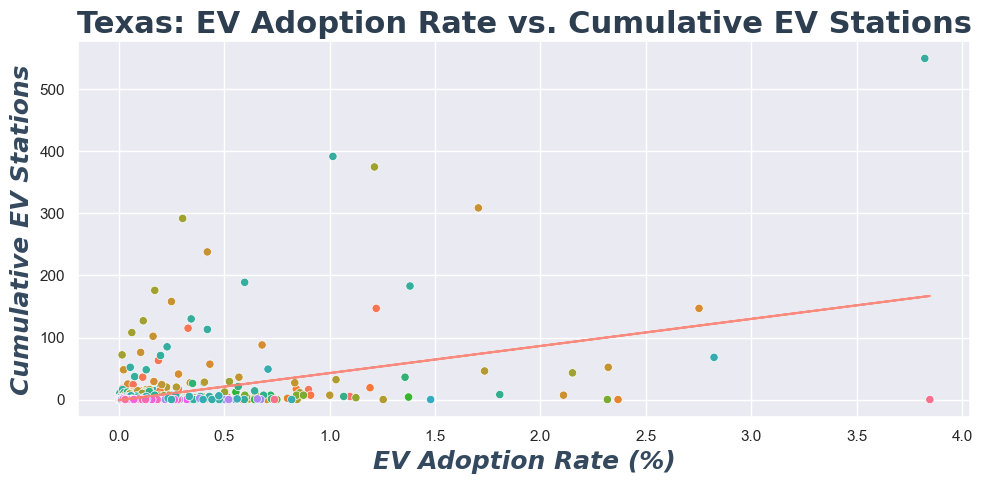

In [13]:
fig, ax = create_scatter_plot(
    df=tx_df, 
    x='ev_adoption_rate', 
    y='cumulative_ev_stations', 
    hue='county', 
    title='Texas: EV Adoption Rate vs. Cumulative EV Stations', 
    xlabel='EV Adoption Rate (%)',
    ylabel='Cumulative EV Stations'
)

file_name = "tx_ev_adoption_rate_vs_cumulative_ev_stations.png"
file_path = Path(f"../../../../../reports/figures/scatterplots_correlation_counties/{file_name}")

fig.savefig(file_path, bbox_inches="tight")

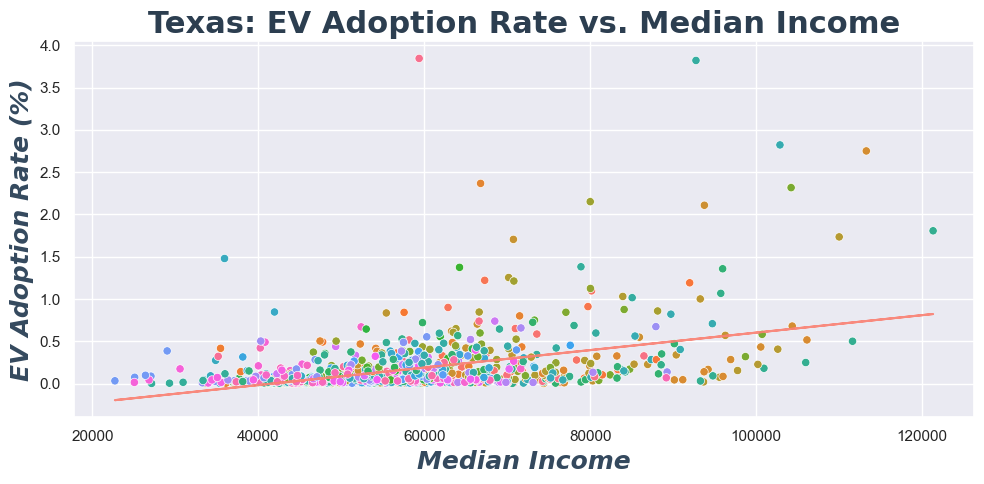

In [14]:
fig, ax = create_scatter_plot(
    df=tx_df, 
    y='ev_adoption_rate', 
    x='median_income', 
    hue='county', 
    title='Texas: EV Adoption Rate vs. Median Income', 
    ylabel='EV Adoption Rate (%)',
    xlabel='Median Income'
)

file_name = "tx_ev_adoption_rate_vs_median_income.png"
file_path = Path(f"../../../../../reports/figures/scatterplots_correlation_counties/{file_name}")

fig.savefig(file_path, bbox_inches="tight")

# Florida Correlation Analysis:

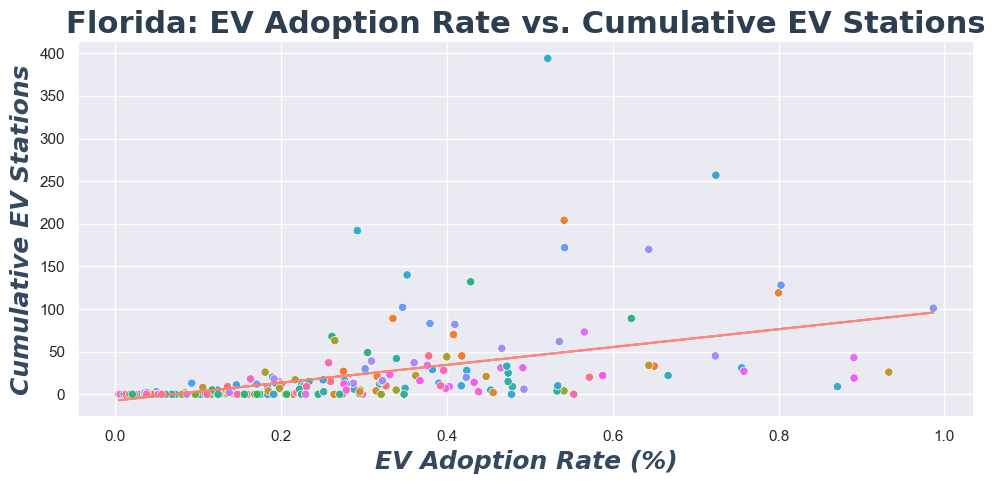

In [15]:
fig, ax = create_scatter_plot(
    df=fl_df, 
    x='ev_adoption_rate', 
    y='cumulative_ev_stations', 
    hue='county', 
    title='Florida: EV Adoption Rate vs. Cumulative EV Stations', 
    xlabel='EV Adoption Rate (%)',
    ylabel='Cumulative EV Stations'
)

file_name = "fl_ev_adoption_rate_vs_cumulative_ev_stations.png"
file_path = Path(f"../../../../../reports/figures/scatterplots_correlation_counties/{file_name}")

fig.savefig(file_path, bbox_inches="tight")


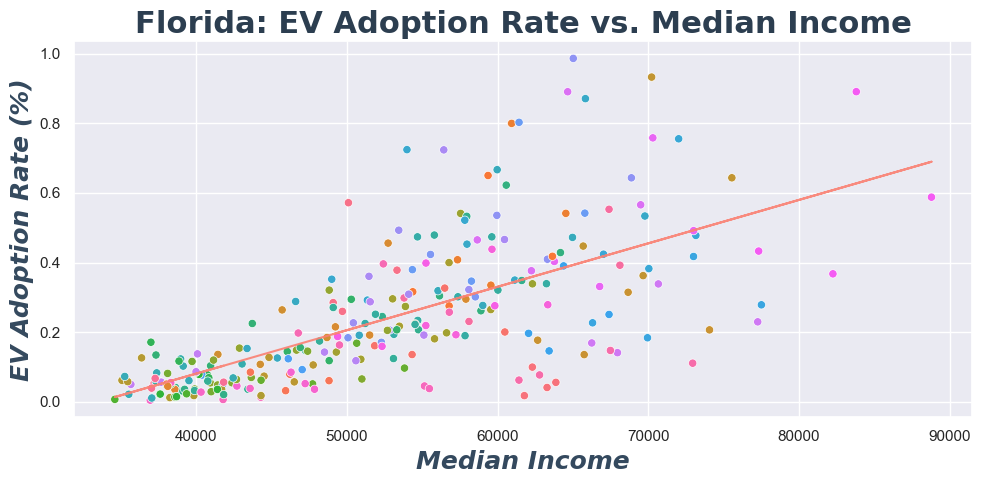

In [16]:
fig, ax = create_scatter_plot(
    df=fl_df, 
    y='ev_adoption_rate', 
    x='median_income', 
    hue='county', 
    title='Florida: EV Adoption Rate vs. Median Income', 
    ylabel='EV Adoption Rate (%)',
    xlabel='Median Income'
)

file_name = "fl_ev_adoption_rate_vs_median_income.png"
file_path = Path(f"../../../../../reports/figures/scatterplots_correlation_counties/{file_name}")

fig.savefig(file_path, bbox_inches="tight")

# California Correlation Analysis:

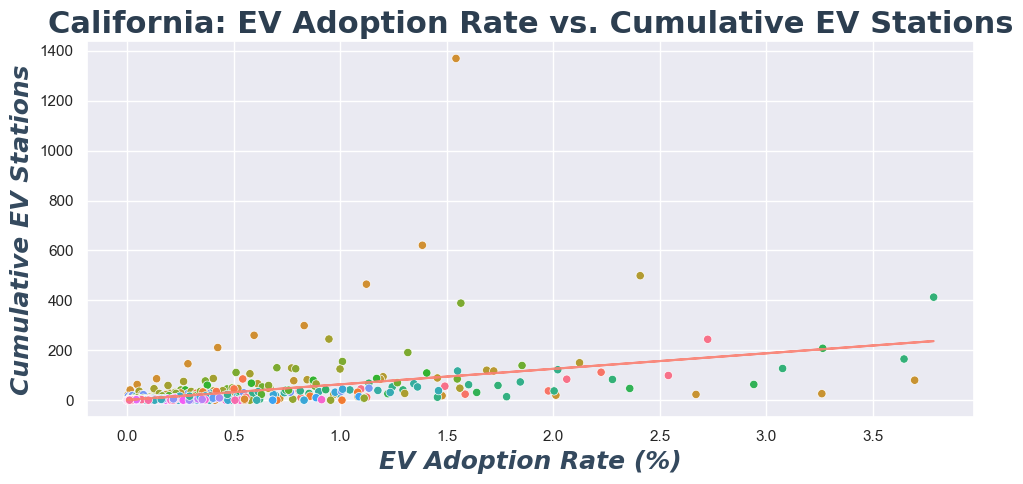

In [17]:
fig, ax = create_scatter_plot(
    df=ca_df, 
    x='ev_adoption_rate', 
    y='cumulative_ev_stations', 
    hue='county', 
    title='California: EV Adoption Rate vs. Cumulative EV Stations', 
    xlabel='EV Adoption Rate (%)',
    ylabel='Cumulative EV Stations'
)

file_name = "ca_ev_adoption_rate_vs_cumulative_ev_stations.png"
file_path = Path(f"../../../../../reports/figures/scatterplots_correlation_counties/{file_name}")

fig.savefig(file_path, bbox_inches="tight")

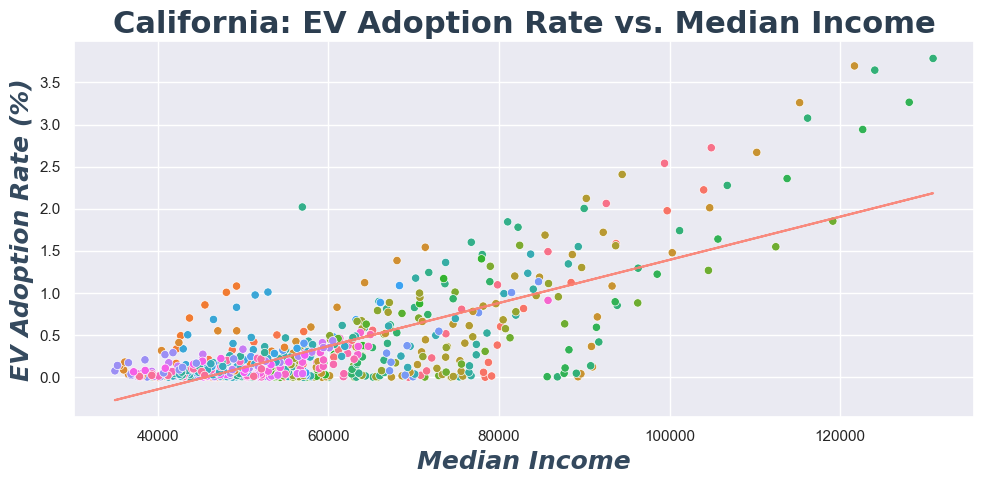

In [18]:
fig, ax = create_scatter_plot(
    df=ca_df, 
    y='ev_adoption_rate', 
    x='median_income', 
    hue='county', 
    title='California: EV Adoption Rate vs. Median Income', 
    ylabel='EV Adoption Rate (%)',
    xlabel='Median Income'
)

file_name = "ca_ev_adoption_rate_vs_median_income.png"
file_path = Path(f"../../../../../reports/figures/scatterplots_correlation_counties/{file_name}")

fig.savefig(file_path, bbox_inches="tight")